# Pion $\phi$ in $q$-frame

last edit Apr-7, 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;

%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Auxiliary functions

# (1) Load data 
1. Measured data from 1 run of 10.2 GeV
2. Simulated data from GEMC simulation of uniform pion direction

In [78]:
load_SIDIS_data( Nruns = 1)

Run number  6420 (1/1 runs)
Loaded 24221 (e,e piplus ) events and  48 (e,e piplus n), events
retained 25 (e,e piplus n), events with Pn > 275 MeV/c
Loaded 10427 (e,e piminus ) events and  7 (e,e piminus n), events
retained 7 (e,e piminus n), events with Pn > 275 MeV/c
Done loading files.


In [79]:
apply_further_selection_cuts_to_data(fdebug=2)

(e,e piplus )
24221 events before cut
16713 events after p-theta cut (69.0 %)
15027 events after M_X cut (62.0 %)
(e,e piminus )
10427 events before cut
10113 events after p-theta cut (97.0 %)
9350 events after M_X cut (89.7 %)


# (2) Plot

In [80]:
theta_bins   = np.linspace(0,60,61)
theta_xticks = np.linspace(0,60,5)
theta_xlim   = [0,60]

In [81]:
pi_ch = 'piplus'
df  = e_e_pi_pass_cuts[pi_ch];

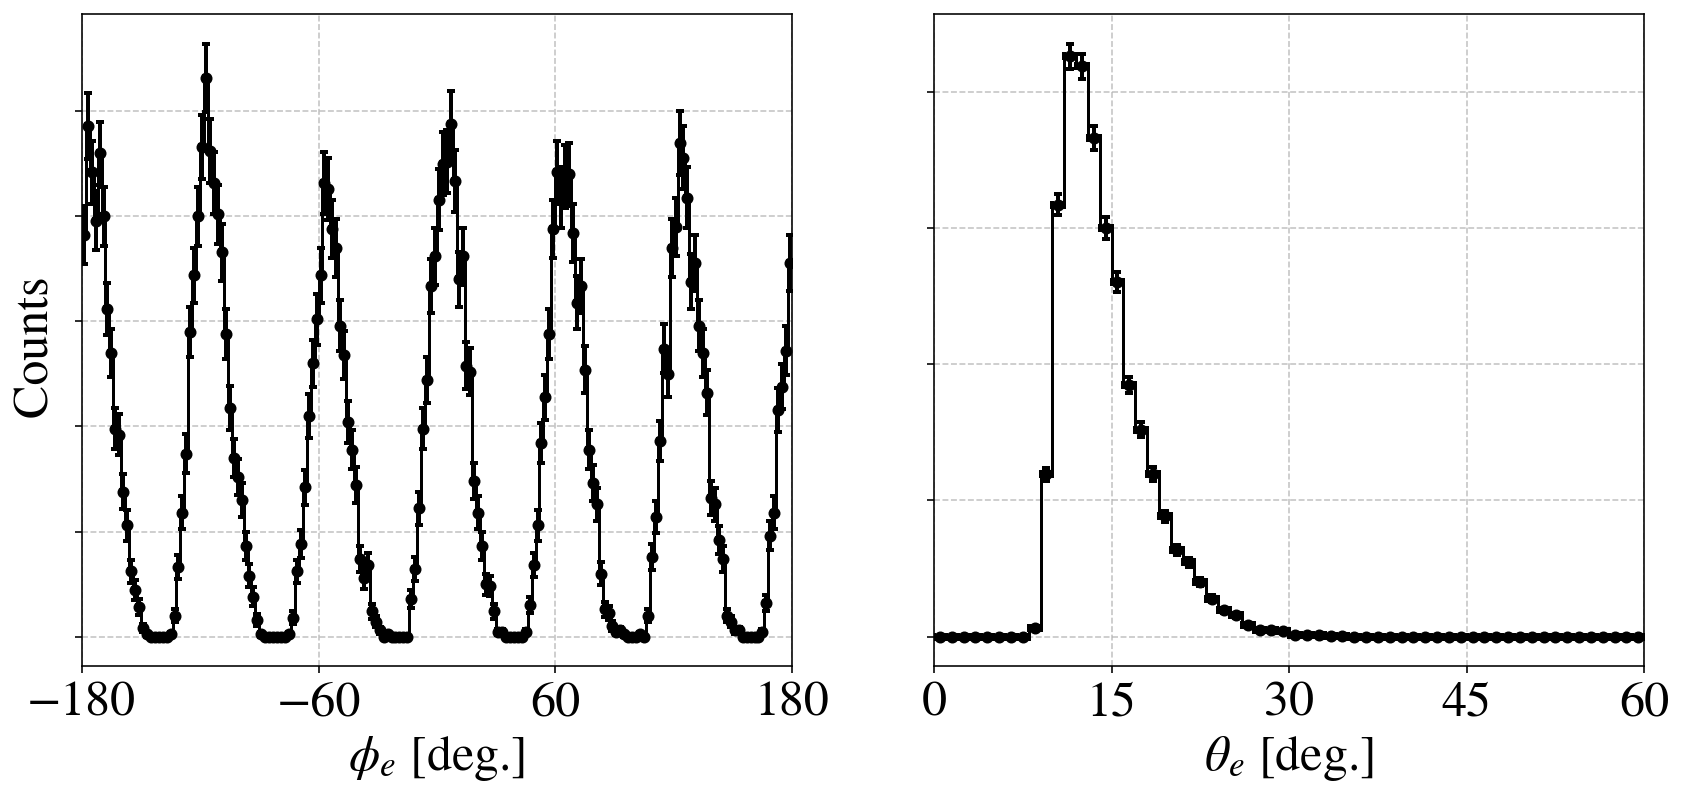

In [82]:
fig = plt.figure(figsize=(14,6));
ax = fig.add_subplot(1,2,1)
plot_step_hist( df.e_Phi*r2d, bins=phi_bins, color='k')
set_axes(ax,'$\phi_e$ [deg.]','Counts ',remove_ticks_y=True,title='', 
         do_add_grid=True,do_add_legend=False, xlim=phi_xlim, 
         xticks=phi_xticks
        );
ax = fig.add_subplot(1,2,2)
plot_step_hist( df.e_Theta*r2d, bins=theta_bins, color='k')
set_axes(ax,'$\\theta_e$ [deg.]',' ',remove_ticks_y=True,title='', 
         do_add_grid=True,do_add_legend=False, xlim=theta_xlim,          
         xticks=theta_xticks
        );

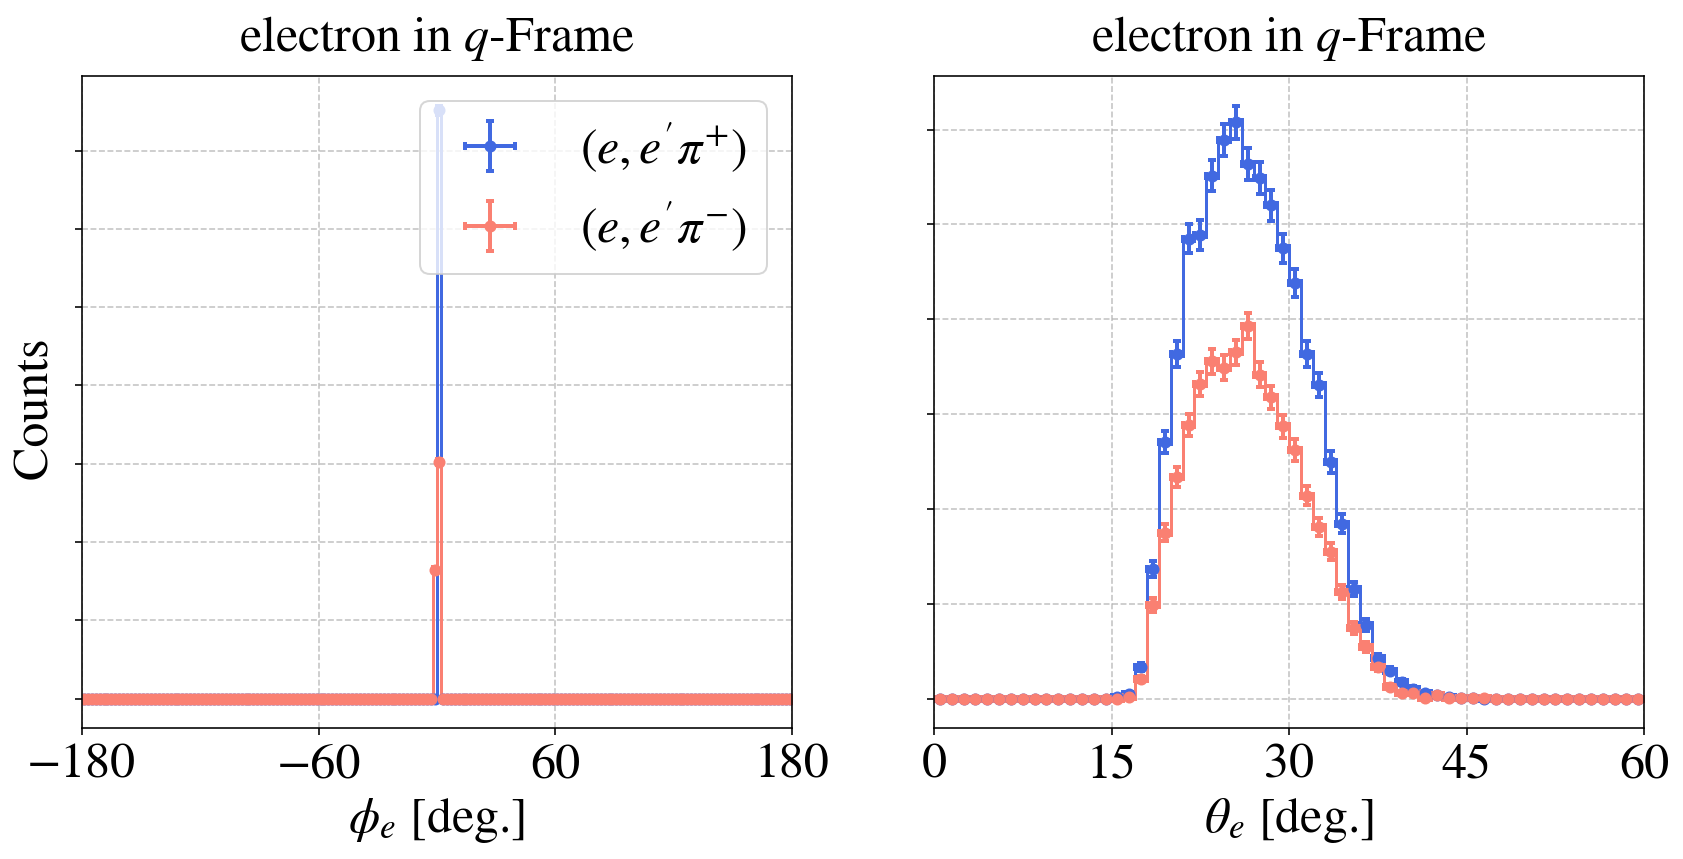

In [84]:
fig = plt.figure(figsize=(14,6));
ax = fig.add_subplot(1,2,1)
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    df  = e_e_pi_pass_cuts[pi_ch];
    plot_step_hist( df.e_Phi_qFrame*r2d, bins=phi_bins, color=pi_color,label="$(e,e'"+pi_label+")$" )
set_axes(ax,'$\phi_e$ [deg.]','Counts ',remove_ticks_y=True,title='electron in $q$-Frame', 
         do_add_grid=True,do_add_legend=True, xlim=phi_xlim, 
         xticks=phi_xticks
        );
ax = fig.add_subplot(1,2,2)
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    df  = e_e_pi_pass_cuts[pi_ch];
    plot_step_hist( df.e_Theta_qFrame*r2d, bins=theta_bins, color=pi_color,label='$'+pi_label+'$')
set_axes(ax,'$\\theta_e$ [deg.]',' ',remove_ticks_y=True,title='electron in $q$-Frame', 
         do_add_grid=True,do_add_legend=False, xlim=theta_xlim,          
         xticks=theta_xticks
        );

## Plot pions

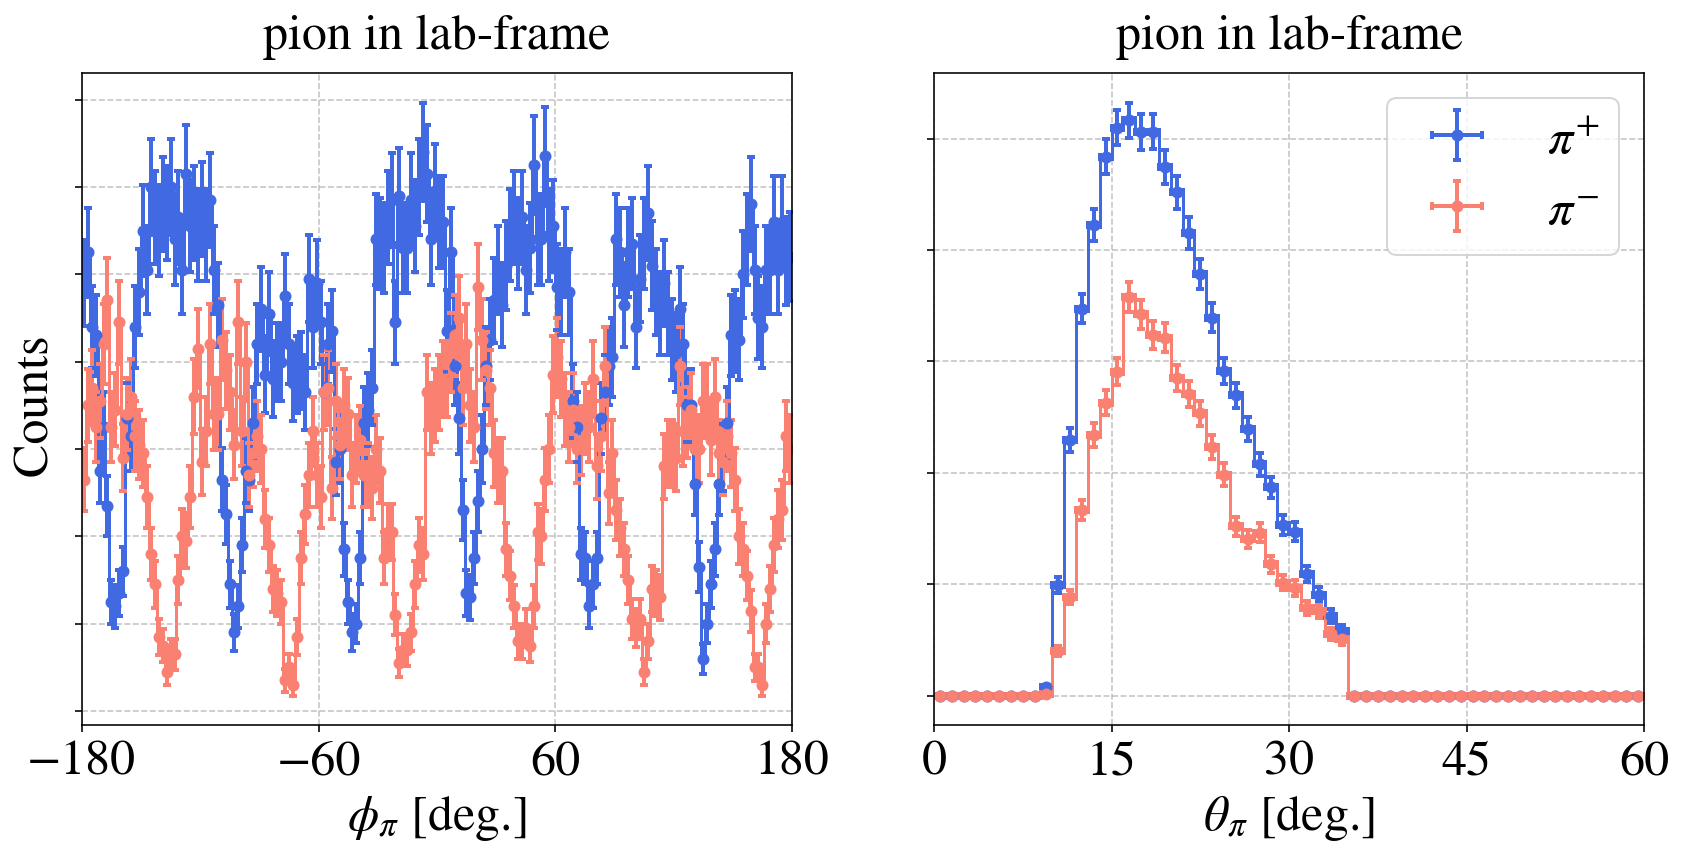

In [90]:
fig = plt.figure(figsize=(14,6));
ax = fig.add_subplot(1,2,1)
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    df  = e_e_pi_pass_cuts[pi_ch];
    plot_step_hist( df.pi_Phi*r2d, bins=phi_bins, color=pi_color,label='$'+pi_label+"$" )
set_axes(ax,'$\phi_\pi$ [deg.]','Counts ',remove_ticks_y=True,title='pion in lab-frame', 
         do_add_grid=True,do_add_legend=False, xlim=phi_xlim, 
         xticks=phi_xticks
        );
ax = fig.add_subplot(1,2,2)
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    df  = e_e_pi_pass_cuts[pi_ch];
    plot_step_hist( df.pi_Theta*r2d, bins=theta_bins, color=pi_color,label='$'+pi_label+"$")
set_axes(ax,'$\\theta_\pi$ [deg.]',' ',remove_ticks_y=True,title='pion in lab-frame', 
         do_add_grid=True,do_add_legend=True, xlim=theta_xlim,          
         xticks=theta_xticks
        );

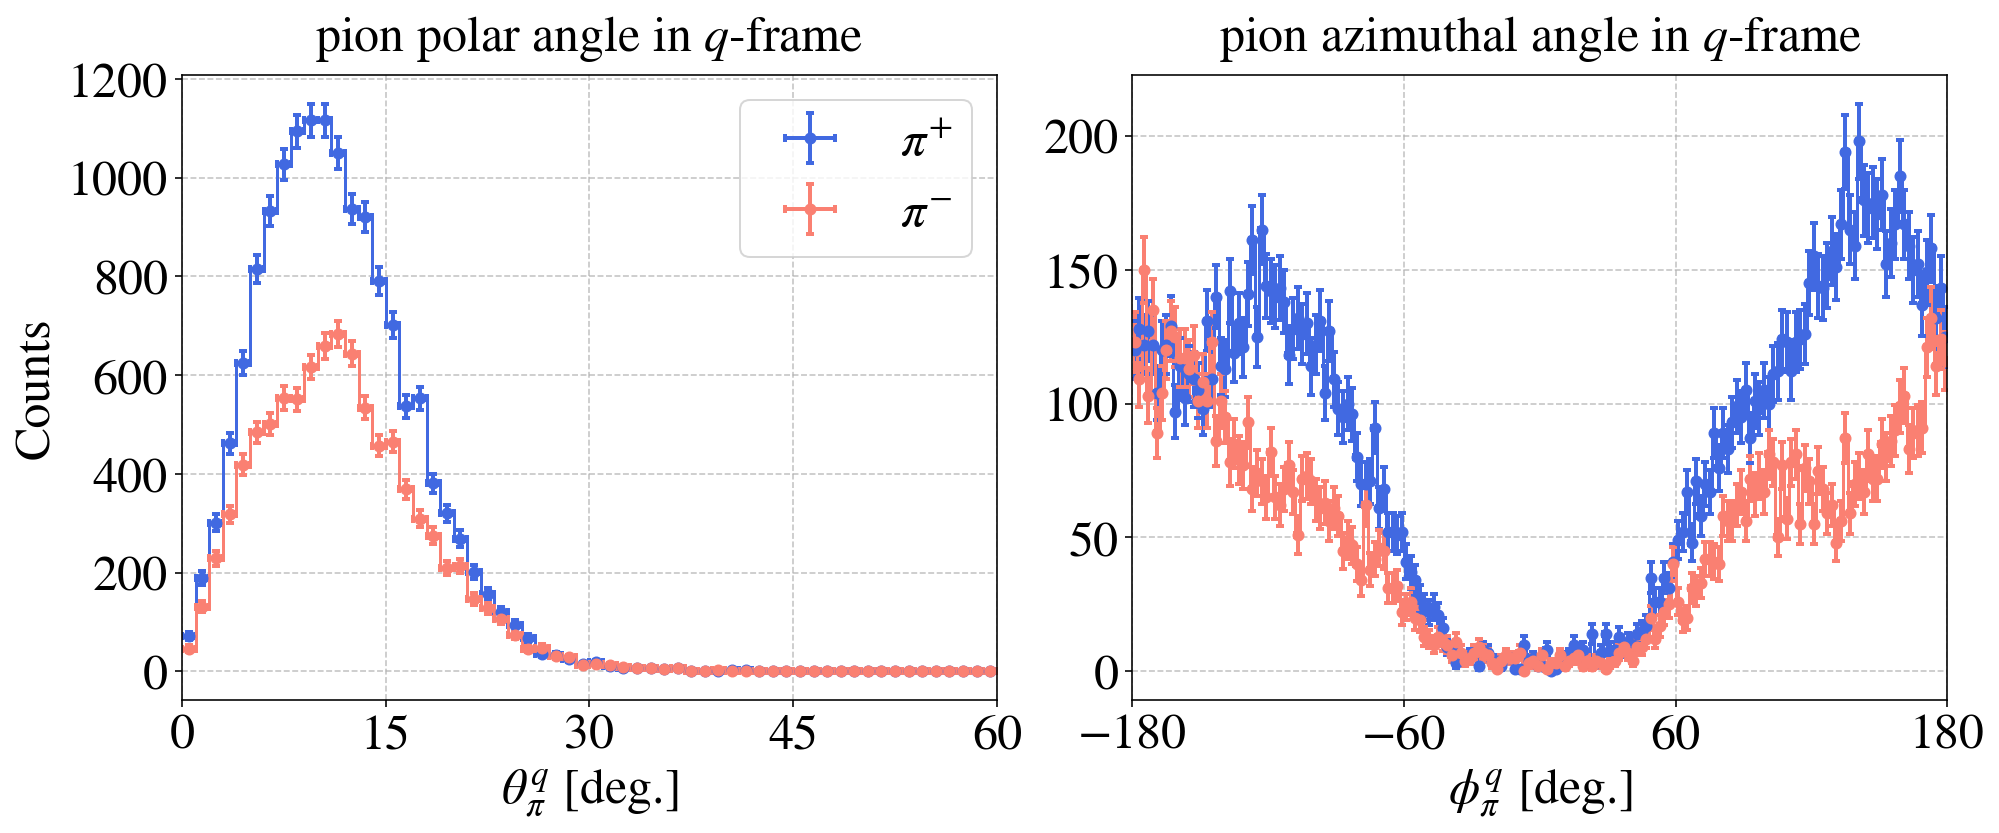

In [89]:
fig = plt.figure(figsize=(14,6));

ax = fig.add_subplot(1,2,1)
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    df  = e_e_pi_pass_cuts[pi_ch];
    plot_step_hist( df.pi_Theta_qFrame*r2d, bins=theta_bins, color=pi_color,label='$'+pi_label+"$" )
set_axes(ax,'$\\theta^q_\pi$ [deg.]','Counts',remove_ticks_y=False,title='pion polar angle in $q$-frame', 
         do_add_grid=True,do_add_legend=True, xlim=theta_xlim,          
         xticks=theta_xticks
        );

ax = fig.add_subplot(1,2,2)
for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
    df  = e_e_pi_pass_cuts[pi_ch];
    plot_step_hist( df.pi_Phi_qFrame*r2d, bins=phi_bins, color=pi_color,label='$'+pi_label+"$" )
set_axes(ax,'$\phi^q_\pi$ [deg.]','',remove_ticks_y=False,title='pion azimuthal angle in $q$-frame', 
         do_add_grid=True,do_add_legend=False, xlim=phi_xlim, 
         xticks=phi_xticks
        );
plt.tight_layout()
